### Objective:
Create meaningful estimators from the hotel dataset and to select the model that predicts the cancellation best by comparing them with each accuracy score.

In [459]:
# Libraries for EDA
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# sklearn
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [15]:
DATA_DIR = "/Users/jie/Desktop/final_project"

In [16]:
pd.set_option("display.precision", 2)

In [17]:
df = pd.read_csv(os.path.join(DATA_DIR, 'hotel_bookings.csv'))

In [18]:
df.shape

(119390, 32)

In [281]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.00,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.00,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [24]:
# make a copy of the original dataset
hotel = df.copy()

### 1. Exploratory Data Analysis (EDA)


#### 1.1 Hotel Type
#### 1.2 Guests(first time vs repeated) Type And Cancelations Of Hotels(resort vs city)
#### 1.3 Month and Average Rate Effects on cancelation
#### 1.3 Hotel type with more time spent
#### 1.4 Deposit rule Effect On Cancelation


1.1 Hotel Type

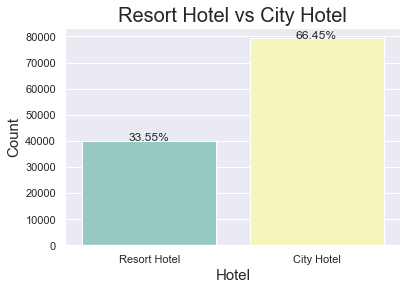

In [227]:
ax = sns.countplot(x="hotel", data=hotel, palette="Set3")
plt.title("Resort Hotel vs City Hotel", fontsize=20)
plt.xlabel("Hotel", fontsize=15)
plt.ylabel("Count", fontsize=15)
total = len(hotel["hotel"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In this dataset, there are two types of hotels. 33.55% are resort hotels. 66.45% are city hotels. Different type of hotels provide different services for customers. For resort hotels, customers are more likely to spend the majority time in the hotel, while people don't have many activities to do in a city hotel, and it is ussually for business needs. 

1.2 Guests(first time vs repeated) Type And Cancelations Of Hotels(resort vs city)

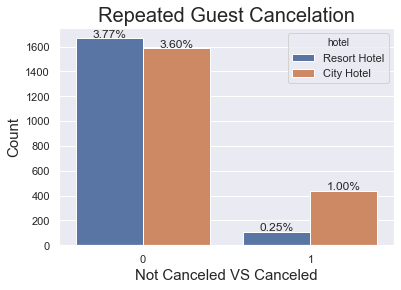

In [268]:
g = sns.countplot(x="is_canceled", hue="hotel", data=hotel.query("is_repeated_guest != 0"))
plt.title("Repeated Guest Cancelation", fontsize=20)
plt.xlabel("Not Canceled VS Canceled", fontsize=15)
plt.ylabel("Count", fontsize=15)
total = sum(map(lambda i: i != 0, hotel['is_canceled']))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

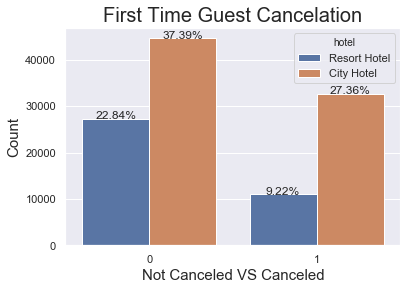

In [261]:
g = sns.countplot(x="is_canceled", hue="hotel", data=hotel.query("is_repeated_guest != 1"))
plt.title("First Time Guest Cancelation", fontsize=20)
plt.xlabel("Not Canceled VS Canceled", fontsize=15)
plt.ylabel("Count", fontsize=15)
total = len(hotel["is_repeated_guest"]==0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

As the two graphes show, more new guests than repeated guests canceled hotels. However, the number of repeated guests are much less than the number of the first guest. Both first time guests and repeated guests cancelled more city hotels than resort hotels. 

1.3 Month and Average Rate Effects on cancelation

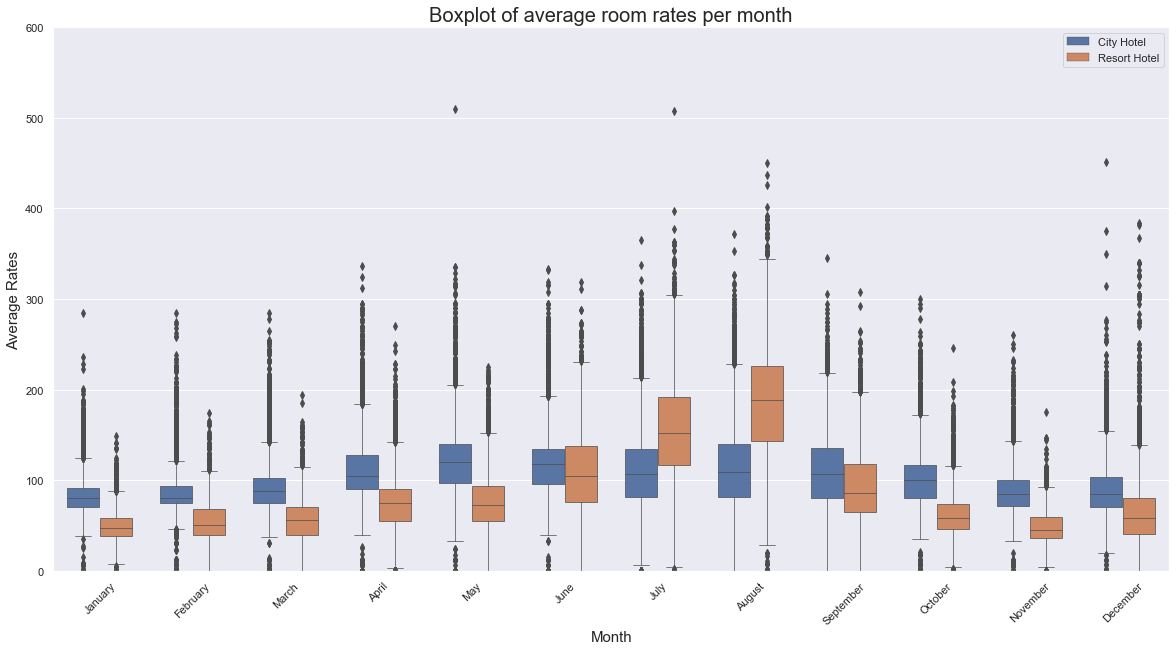

In [155]:
plt.figure(figsize = (20,10))
g=sns.boxplot(x="arrival_date_month", y="adr", hue='hotel',
              hue_order = ["City Hotel", "Resort Hotel"], 
              order = ["January", "February", "March", "April", "May", "June", 
                       "July", "August", "September", "October", "November", "December"],
              data=hotel, linewidth=0.7, width=0.7,);
g.set(ylim=(0, 600))
plt.title("Boxplot of average room rates per month", fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Average Rates", fontsize=15)
plt.show()

The variation of the average room rate of resort hotels is much larger than the average rates of city hotels. Not surprisingly, the average rates of resort hotels in August is the highest rate in a year. Also, the median of average rates of resort hotels is higher than the median of the average rates of city hotels in July and August.

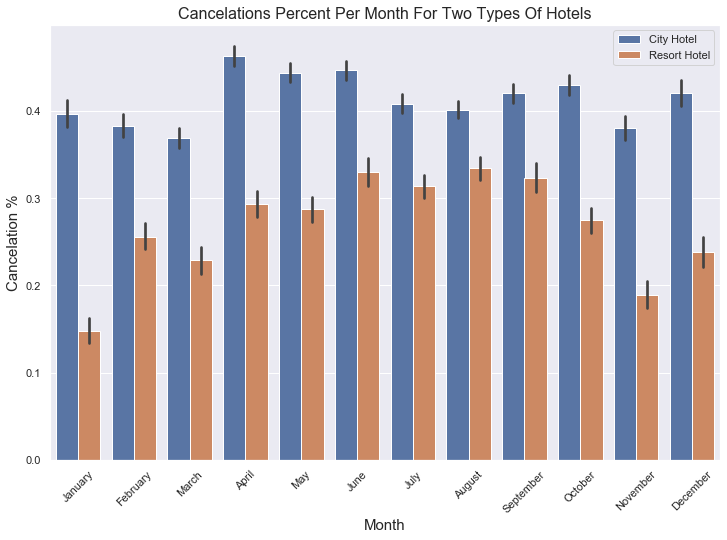

In [280]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="arrival_date_month", y="is_canceled", hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"],
            order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
            data=hotel)
plt.title("Cancelations Percent Per Month For Two Types Of Hotels", fontsize=16)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Cancelation %", fontsize=15)
plt.legend(loc="upper right")
plt.show()

The cancelations rate of resort hotels are higher in June, July, August and August comparing with other monthes. The cancelations rate of city hotels are higher in April, May, and June comparing with other monthes.  

1.4 Deposit rule Effect On Cancelation

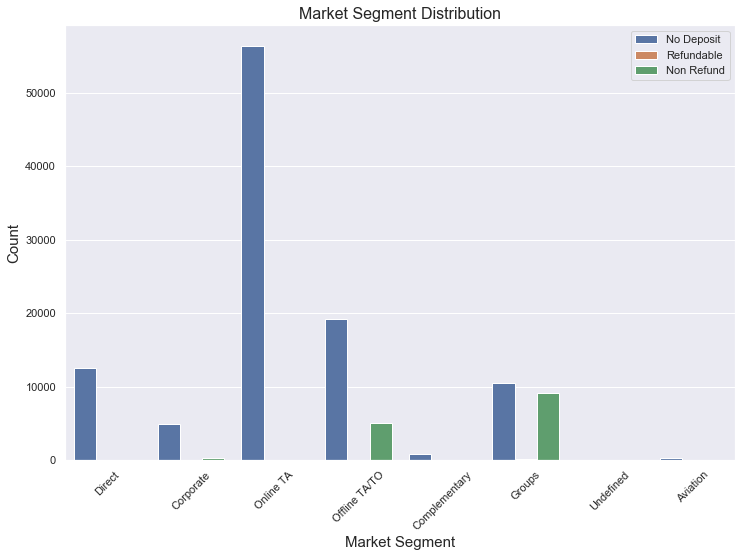

In [278]:
plt.figure(figsize = (12,8))
plt.title("Distrubiton of Segment by Deposit Type", fontsize=22)
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = hotel)
plt.title("Market Segment Distribution", fontsize=16)
plt.xlabel("Market Segment", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=15)
plt.legend(loc="upper right")
plt.show()

Online TA does not require deposit. Offline TA/TO and Groups usually need to pay nonrefundable deposit.

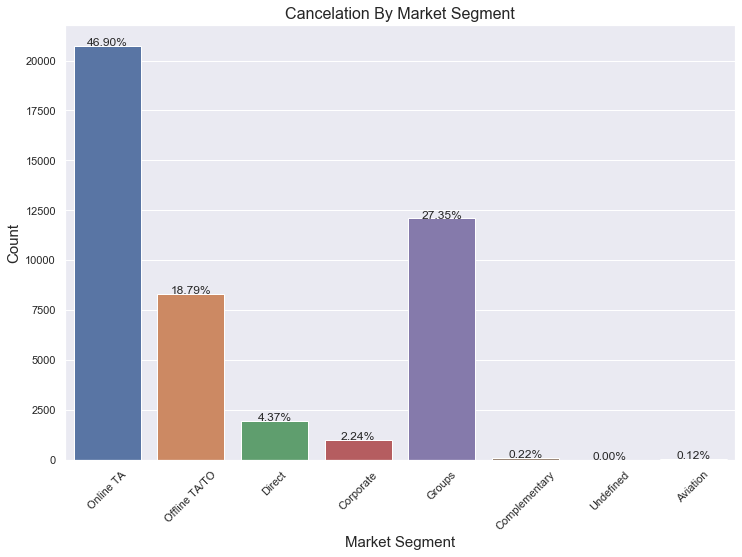

In [277]:
plt.figure(figsize = (12,8))
plt.title("Distributon of Segments by Cancellation", fontsize = 22)
ax = sns.countplot(x = "market_segment", data = hotel.query("is_canceled != 0"))
plt.title("Cancelation By Market Segment", fontsize=16)
plt.xlabel("Market Segment", fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=15)
total = sum(map(lambda i: i != 0, hotel['is_canceled'])) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
plt.show()

Since online TA usually does not require deposit when booking hotels, the cancelations are much higher than other market segment. 

### 2. Data Preprocessing


#### 2.1 Missing Value Handling
#### 2.2 Feature Engineering



2.1 Missing Value Handling

In [282]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [293]:
def percent_mv(x, y):
    per_mv = y.isnull().sum() / len(x) * 100
    return per_mv

print('Percent Of Missing Value:\nChildren: {:1.4f}%\nCountry:{:1.4f}%\nAgent: {:1.4f}%\nCompany: {:1.4f}%'
      .format(percent_mv(hotel, hotel['children']),percent_mv(hotel, hotel['country']),
              percent_mv(hotel, hotel['agent']),percent_mv(hotel, hotel['company'])))


Percent Of Missing Value:
Children: 0.0034%
Country:0.4087%
Agent: 13.6862%
Company: 94.3069%


* The missing values in the children column is close to 0. We cna put 0 for the missing values.
* The country column only has less than 0.5% missing values. We can drop the corresponding rows.
* The agent column has 13.69% missing values. Since the majority of elements in the column can be used, we can drop the corresponding rows to reduce the missing value effect from Agent column. 
* 94.31% values in the company column are missing. As described in the dataset, companies are represented by ID numbers, which means we are unable to generate accurate and valid numbers to fill the missing ones. The best way to handle the missing values in company column is drop the entire column. 


In [323]:
# missing values handling 
hotel_new = hotel.copy()
hotel_new.drop(['company'], axis = 1)
hotel_new["children"].fillna(0)
hotel_new["country"].fillna(0)
hotel_new.drop(hotel_new[hotel_new['country'] ==0].index, inplace = True)

2.2 Feature Engineering

In [330]:
# Data types of each columns
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [352]:
# create dummy variables for hotel type
df_new = pd.get_dummies(hotel_new, columns=["hotel"])

In [353]:
# create three variables
def is_deposit(df):
    """ assign 0 or 1 to identify the deposit type"""
    if ((df["deposit_type"] == "No Deposit") | (df["deposit_type"] == "Refundable")):
        return 0
    else:
        return 1
    
def is_transient(df):
    """ assign 0 or 1 to identify the customer type"""
    if ((df["customer_type"] == "Transient") | (df["customer_type"] == "Transient-Party")):
        return 1
    else:
        return 0
    
def is_family(df):
    """ assign 0 or 1 to identify the family"""
    if ((df['adults'] > 0) & (df['children'] > 0) | (df['adults'] > 0) & (df['babies'] > 0)):
        return 1
    else:
        return 0
    return val   

df_new["is_family"] = df_new.apply(is_family, axis = 1)
df_new["is_transient"] = df_new.apply(is_transient, axis = 1)
df_new["is_deposit"] = df_new.apply(is_deposit, axis =1)

#encoding values to each month
df_new['arrival_date_month'] = df_new['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

#aggreate the the columns
df_new["total_customer"] = df_new["adults"] + df_new["children"] + df_new["babies"]

df_new = df_new.drop(columns = ["adults", "babies", "children", "deposit_type","customer_type"])


In [354]:
# get correlations 
cancel_corr = df_new.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

is_deposit                       0.48
lead_time                        0.29
total_of_special_requests        0.23
required_car_parking_spaces      0.20
booking_changes                  0.14
hotel_City Hotel                 0.14
hotel_Resort Hotel               0.14
previous_cancellations           0.11
is_repeated_guest                0.08
agent                            0.08
previous_bookings_not_canceled   0.06
days_in_waiting_list             0.05
adr                              0.05
total_customer                   0.05
is_transient                     0.04
stays_in_week_nights             0.02
company                          0.02
arrival_date_year                0.02
is_family                        0.01
arrival_date_month               0.01
arrival_date_week_number         0.01
arrival_date_day_of_month        0.01
stays_in_weekend_nights          0.00
Name: is_canceled, dtype: float64

The features below will be used due to their high correlations with is_canceled.
* is_deposit                       
* lead_time                        
* total_of_special_requests        
* required_car_parking_spaces      
* booking_changes                  
* hotel_City Hotel                 
* hotel_Resort Hotel               
* previous_cancellations. 


In [357]:
# a new dataframe containing all features
df_features=df_new[["is_canceled","is_deposit","lead_time","total_of_special_requests","required_car_parking_spaces",
                  "booking_changes","hotel_City Hotel","hotel_Resort Hotel","previous_cancellations"]]


### Modeling 

In [403]:
df_features.head()

,is_canceled,is_deposit,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,hotel_City Hotel,hotel_Resort Hotel,previous_cancellations
0,0,0,342,0,0,3,0,1,0
1,0,0,737,0,0,4,0,1,0
2,0,0,7,0,0,0,0,1,0
3,0,0,13,0,0,0,0,1,0
4,0,0,14,1,0,0,0,1,0


In [358]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split 
y = df_features["is_canceled"]
X = df_features.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [460]:
# Now chain the transformer together with tramsfor and five models transform into a pipeline.
transformer = ColumnTransformer([("poly", PolynomialFeatures(2),[0,3,7]),("norm2",Normalizer(), [1,2,4])])

# logistic regression
logistic_model=Pipeline(steps=([("transformer", transformer), ("LR", LogisticRegression())]))

# random forest
rf_model = Pipeline(steps=([("transformer", transformer),("RF", ensemble.RandomForestClassifier())]))

# MLP
mlp_model = Pipeline(steps=([("transformer", transformer),("GNB", GaussianNB())]))

# Decision Tree
dt_model = Pipeline(steps=([("transformer", transformer),("DT", DecisionTreeClassifier())]))

# XGB
xgb_model = Pipeline(steps=([("transformer", transformer),("XGB", XGBClassifier())]))


In [461]:
lr = logistic_model.fit(X_train,y_train)
rf = rf_model.fit(X_train,y_train)
fnb = mlp_model.fit(X_train,y_train)
dt = dt_model.fit(X_train,y_train)
xgb = xgb_model.fit(X_train,y_train)

In [462]:
from sklearn import metrics
print("Model: Random Forest:")
y_pred = rf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

Model: Random Forest:


0.7637713934723734

In [444]:
print("Model: Logistic Regression")
y_pred = logistic_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

Model: Logistic Regression


0.7664516849540721

In [463]:
print("Model: Gaussian Naive Bayes")
y_pred = mlp_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

Model: Gaussian Naive Bayes


0.521205014378647

In [464]:
print('Model: Decision Tree')
y_pred = dt_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

Model: Decision Tree


0.7644973057486668

In [465]:
print('Model: XGBoost')
y_pred = xgb_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

Model: XGBoost


0.7674009548538403

Based on t

Hyperparameter

In [449]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [450]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("The model performance for baseline model is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae))
print('R2 score is {}'.format(r2))

The model performance for baseline model is:
---------------------------------------------
mean absoulte error is 0.281460264629027
R2 score is 0.3512103853427103


In [451]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2,3,5],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200]
}

In [453]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  3.0min finished


In [455]:
best_grid = grid_search.best_estimator_
y_pred_gridsearch = best_grid.predict(X_test)
mae_gridsearch = mean_absolute_error(y_test, y_pred_gridsearch)
r2_gridsearch=r2_score(y_test, y_pred_gridsearch)
print("The model performance for testing set from grid search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_gridsearch))
print('R2 score is {}'.format(r2_gridsearch))
print('Improvement of {:0.2f}%.'.format( 100 * (r2_gridsearch- r2) / r2))

The model performance for testing set from grid search
--------------------------------------
mean absoulte error is 0.2890982481944067
R2 score is 0.37641925125380704
Improvement of 7.18%.


We got 7.18% improvement by using hyperparameter. 